In [63]:
from skimage.metrics import structural_similarity
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras 

In [29]:
import imutils
import cv2

In [30]:
from PIL import Image

In [31]:
import requests

In [32]:
!mkdir pan_card_tampering


A subdirectory or file pan_card_tampering already exists.


In [33]:
!mkdir pan_card_tampering/image


The syntax of the command is incorrect.


In [34]:
 #open image and display
import requests

In [35]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream =True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)
original.show()

ConnectionError: HTTPSConnectionPool(host='www.thestatesman.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/07/pan-card.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000026D7FC33620>: Failed to resolve 'www.thestatesman.com' ([Errno 11001] getaddrinfo failed)"))

In [36]:
original = original.resize((250,160))
print(original.size)

(250, 160)


In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

c:\Users\HITECH\Desktop\Image processing\kapda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
original.save(r'C:\Users\HITECH\Desktop\Image processing\pan_card_tampering\image\original.jpg')

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [66]:
tampered = tampered.resize((250,160))
print(tampered.size)

AttributeError: 'NoneType' object has no attribute 'size'

In [67]:
tampered.save(r'C:\Users\HITECH\Desktop\Image processing\pan_card_tampering\image\tampered.png')

AttributeError: 'NoneType' object has no attribute 'save'

In [68]:
original

array([[[255, 253, 255],
        [253, 251, 254],
        [250, 250, 252],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[254, 252, 255],
        [252, 252, 254],
        [250, 250, 252],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[253, 253, 255],
        [251, 251, 253],
        [250, 250, 252],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[243, 245, 244],
        [230, 229, 227],
        [227, 217, 215],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [231, 238, 244]],

       [[248, 255, 255],
        [245, 251, 249],
        [250, 249, 245],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [250, 251, 253]],

       [[238, 253, 250],
        [240, 251, 247],
        [253, 255, 252],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [255, 254, 255]]

In [69]:
tampered

In [70]:
#to load the images
original = cv2.imread(r'C:\Users\HITECH\Desktop\Image processing\pan_card_tampering\image\original.jpg')

In [71]:

tampered = cv2.imread('pan_card_tampering/image/tampered.png')

Reading images

In [72]:
import requests
from PIL import Image
import numpy as np
import cv2
from io import BytesIO

In [73]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [74]:
from skimage import color, io

# Read the image
original = io.imread(r'C:\Users\HITECH\Desktop\Image processing\pan_card_tampering\image\original.jpg')
tampered=io.imread(r'C:\Users\HITECH\Desktop\Image processing\pan_card_tampering\image\tampered.png')


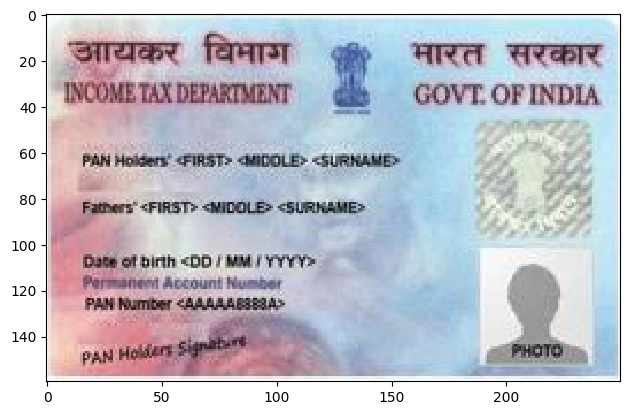

In [75]:
io.imshow(original)

In [76]:
(score,diff) = structural_similarity(original_gray,tampered_gray,full=True)

In [77]:
diff = (diff*255).astype("uint8")

In [78]:
print("SSIM:{}".format(score))

SSIM:0.32278988426466426


In [79]:
diff

array([[234, 215, 187, ...,  93,  86,  89],
       [231, 218, 198, ..., 119, 115, 115],
       [229, 221, 210, ..., 145, 141, 141],
       ...,
       [184, 204, 203, ..., 178, 185, 194],
       [172, 197, 187, ..., 155, 167, 184],
       [150, 189, 180, ..., 143, 155, 166]], dtype=uint8)

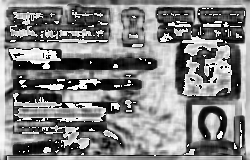

In [80]:
Image.fromarray(diff)

In [81]:
thresh =cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]

In [82]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [83]:
for c in cnts:
  # applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x+w, y+h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x,y), (x+w, y+h), (0, 0, 255), 2)

Original Image


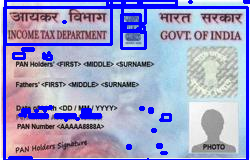

In [84]:
print("Original Image")
Image.fromarray(original)

Tampered Image


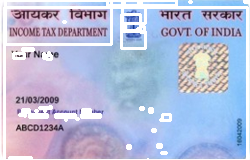

In [85]:
print("Tampered Image")
Image.fromarray(tampered)

Difference bw the 2 Images


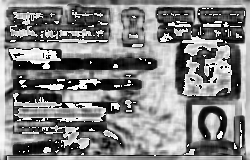

In [86]:
print("Difference bw the 2 Images")
Image.fromarray(diff)

Threshold Image


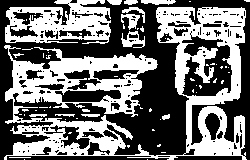

In [87]:
# Displaying the Threshold Image with White portion
print("Threshold Image")
Image.fromarray(thresh)

In [89]:
model.save('pan_card.h5')
